# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [27]:
import requests
import random
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'f30ff3966f16ed62f5165a229a19b319'
# The actual url to call 
url = URL_TEMPLATE.format(user_id=user_id)
# Execute the HTTP Get request
response = requests.get(url)
# Format the json response as a Python dict
data = response.json()
print(data['age'])

19


In [12]:
def get_node(user_id):
    # Base url of the API
    URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
    # The actual url to call 
    url = URL_TEMPLATE.format(user_id=user_id)
    # Execute the HTTP Get request
    response = requests.get(url)
    # Format the json response as a Python dict
    data = response.json()
    return data

In [39]:
#random walker 
def random_walker(source_node_id, N, print_visited=False):
    temp_node=get_node(source_node_id)
    temp_node_id=source_node_id
    i=0
    age=0
    visited=dict()
    while i<N:
        
        if print_visited:
            visited[temp_node_id] = visited.get(temp_node_id, 0) + 1
        
        age=age+temp_node['age']
        #select next node randomly from freinds/neighbours
        friends=temp_node['friends']
        temp_node_id=random.choice(friends)
        temp_node=get_node(temp_node_id)
        i=i+1
        
    
    #do not allow division by 0 
    if N==0:
        print ("No nodes visited, N=0")
    else :
        av_age=age/N
        print ("average age: ",av_age)
        print ("nodes visited: ", N)
        
        if print_visited:
            width = 0.5     # gives histogram aspect to the bar diagram
            #hide x axis(node_id too long)
            ax = plt.axes()
            ax.set_xticks([])
            
            plt.bar(visited.keys(), visited.values(), width, color='b')
            plt.show()

In [19]:
i = 500
while i < 7001:
    random_walker(user_id,i)
    i=i+500

average age:  31.398
nodes visited:  500
average age:  23.854
nodes visited:  1000
average age:  22.932
nodes visited:  1500
average age:  23.1305
nodes visited:  2000
average age:  23.0336
nodes visited:  2500
average age:  22.822333333333333
nodes visited:  3000
average age:  22.78514285714286
nodes visited:  3500
average age:  22.26625
nodes visited:  4000
average age:  23.034222222222223
nodes visited:  4500
average age:  23.1962
nodes visited:  5000
average age:  23.559454545454546
nodes visited:  5500
average age:  22.675166666666666
nodes visited:  6000
average age:  23.487384615384617
nodes visited:  6500
average age:  22.629
nodes visited:  7000


the average age seems to converge somewhere around 23 years 

How many nodes do we need to get a precise estimate? --> check slides?

#### Exercise 2.8

average age:  23.96066666666667
nodes visited:  1500


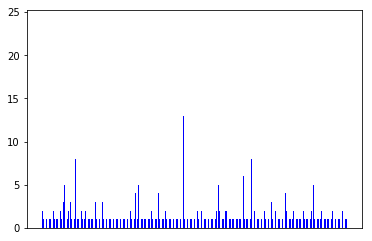

In [35]:
random_walker(user_id,1500,print_visited=True)

We can clearely see that some nodes are visited more than once. So the random walker is often returning to already visited nodes. Those nodes are probably better connected than other and thus more probable to being visited. Of course this destroys the average because well connected nodes weight more than not so well connected ones. Thus we could try to only visit nodes that were not visited before.

In [ ]:
#random walker 
def random_walker2(source_node_id, N, print_visited=False):
    temp_node=get_node(source_node_id)
    temp_node_id=source_node_id
    i=0
    age=0
    visited=dict()
    while i<N:
        
        if print_visited:
            visited[temp_node_id] = visited.get(temp_node_id, 0) + 1
        
        #TODO: only add age if not visited before, and only increment i in that case
        
        age=age+temp_node['age']
        #select next node randomly from freinds/neighbours
        friends=temp_node['friends']
        temp_node_id=random.choice(friends)
        
        tries=0
        threshold=len(friends)*500
        while temp_node_id in visited and threshold>tries:
            temp_node_id=random.choice(friends)
            tries=tries+1 
            if tries==threshold:
                print("visited again")
        #print ("found one, tries: ", tries)
        
        temp_node=get_node(temp_node_id)
        i=i+1
        
    
    #do not allow division by 0 
    if N==0:
        print ("No nodes visited, N=0")
    else :
        av_age=age/N
        print ("average age: ",av_age)
        print ("nodes visited: ", N)
        
        if print_visited:
            width = 0.5     # gives histogram aspect to the bar diagram
            #hide x axis(node_id too long)
            ax = plt.axes()
            ax.set_xticks([])
            
            plt.bar(visited.keys(), visited.values(), width, color='b')
            plt.show()

In [ ]:
random_walker2(user_id,1500,print_visited=True)

found one, tries:  0
found one, tries:  0
found one, tries:  0
found one, tries:  0
found one, tries:  0
found one, tries:  0
found one, tries:  0
found one, tries:  0
visited again
